# Import Libraries

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

# Cleaning Data
Cleaning data for get accurate insight

## Data User

In [ ]:
#Import data  user
df_user = pd.read_csv('https://docs.google.com/spreadsheets/d/1IL6tzEjXLbYIGIY9FzB8qIbu1oAXes7mDoOJeUfKKr0/export?format=csv&gid=979933717')
df_user.head()

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,NaN,Gaji
1,3485491,2021-10-09 11:11:34,Female,55,Others,> Rp 50 Juta - 100 Juta,NaN,Gaji
2,1071649,2021-10-08 1:27:30,Male,50,Swasta,Rp 10 Juta - 50 Juta,NaN,Gaji
3,3816789,2021-08-12 7:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,NaN,Gaji
4,3802293,2021-08-15 9:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji


In [ ]:
# Check datatype
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   user_id                       14712 non-null  int64 
 1   registration_import_datetime  14712 non-null  object
 2   user_gender                   14712 non-null  object
 3   user_age                      14712 non-null  int64 
 4   user_occupation               14712 non-null  object
 5   user_income_range             14712 non-null  object
 6   referral_code_used            5604 non-null   object
 7   user_income_source            14712 non-null  object
dtypes: int64(2), object(6)
memory usage: 919.6+ KB


In [ ]:
#Changing registration_import_datetime data type 'string' t0 'datetime'
df_user['registration_import_datetime'] = pd.to_datetime(df_user['registration_import_datetime'])
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   user_id                       14712 non-null  int64         
 1   registration_import_datetime  14712 non-null  datetime64[ns]
 2   user_gender                   14712 non-null  object        
 3   user_age                      14712 non-null  int64         
 4   user_occupation               14712 non-null  object        
 5   user_income_range             14712 non-null  object        
 6   referral_code_used            5604 non-null   object        
 7   user_income_source            14712 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 919.6+ KB


In [ ]:
#Checking typos of values
df_user['user_gender'].value_counts()

Male      8977
Female    5735
Name: user_gender, dtype: int64

In [ ]:
#Checking typos of values
df_user['user_occupation'].value_counts()

Pelajar       7887
Swasta        3263
Others        1683
IRT            934
Pengusaha      598
PNS            191
Guru           106
TNI/Polisi      45
Pensiunan        5
Name: user_occupation, dtype: int64

In [ ]:
#Checking typos of values
df_user['user_income_source'].value_counts()

Gaji                     9131
Keuntungan Bisnis        1908
Dari Orang Tua / Anak    1307
Undian                   1001
Tabungan                  419
Lainnya                   414
Dari Suami / istri        300
Hasil Investasi           165
Warisan                    43
Bunga Simpanan             24
Name: user_income_source, dtype: int64

In [ ]:
#Checking typos of values
df_user['user_income_range'].value_counts()

< 10 Juta                   6275
Rp 10 Juta - 50 Juta        4816
> Rp 50 Juta - 100 Juta     2390
> Rp 100 Juta - 500 Juta    1114
> Rp 500 Juta - 1 Miliar      90
> Rp 1 Miliar                 27
Name: user_income_range, dtype: int64

In [ ]:
#Changing categorical to specific values to further analyzing 
df_user['user_income_range'].replace(['< 10 Juta','Rp 10 Juta - 50 Juta','> Rp 50 Juta - 100 Juta','> Rp 100 Juta - 500 Juta','> Rp 500 Juta - 1 Miliar','> Rp 1 Miliar'],['5','25','75','250','750','1000'], inplace= True)
df_user['user_income_range']= pd.to_numeric(df_user['user_income_range'])


In [ ]:
df_user.to_csv('user_cleaned.csv')

### Removing Dupilcates

In [ ]:
#Checking duplicates value
df_user.duplicated().sum()

0

### Removing Irrelevant value

In [ ]:
#Delete columns referral_code-used because irrelevant with business need
df_user.drop('referral_code_used',axis=1,inplace=True)
df_user

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,user_income_source
0,162882,2021-09-17 14:10:44,Female,51,Swasta,750,Gaji
1,3485491,2021-10-09 11:11:34,Female,55,Others,75,Gaji
2,1071649,2021-10-08 01:27:30,Male,50,Swasta,25,Gaji
3,3816789,2021-08-12 07:19:32,Female,53,IRT,75,Gaji
4,3802293,2021-08-15 09:31:24,Female,47,PNS,750,Gaji
...,...,...,...,...,...,...,...
14707,4352347,2021-10-17 15:57:23,Male,49,Swasta,250,Gaji
14708,4288026,2021-10-15 12:44:05,Female,49,Pengusaha,250,Lainnya
14709,4286882,2021-10-11 10:06:15,Female,49,Swasta,250,Dari Suami / istri
14710,4396739,2021-10-21 13:42:20,Male,49,Swasta,250,Gaji


In [ ]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   user_id                       14712 non-null  int64         
 1   registration_import_datetime  14712 non-null  datetime64[ns]
 2   user_gender                   14712 non-null  object        
 3   user_age                      14712 non-null  int64         
 4   user_occupation               14712 non-null  object        
 5   user_income_range             14712 non-null  int64         
 6   user_income_source            14712 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 804.7+ KB


## Data Daily Transaction

In [ ]:
#Import data daily transaction
df_dailytf = pd.read_csv('https://docs.google.com/spreadsheets/d/1uJBVA_LfpBBNbemA8fu06HNFzl7vN-7ETmm5sfXk8B0/export?format=csv&gid=707685914')
df_dailytf.head()

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount
0,50701,2021-08-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10132277.0,10000000.0,NaN
1,50701,2021-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10206945.0,10000000.0,0.0
2,50701,2021-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9956556.0,10000000.0,0.0
3,50701,2021-09-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9914858.0,10000000.0,0.0
4,50701,2021-09-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10016360.0,10000000.0,0.0


In [ ]:
#Checking data types of daily transction
print(df_dailytf.shape)
df_dailytf.info()

(158811, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 14 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   user_id                              158811 non-null  int64  
 1   date                                 158811 non-null  object 
 2   Saham_AUM                            106292 non-null  float64
 3   Saham_invested_amount                106292 non-null  float64
 4   Saham_transaction_amount             100839 non-null  float64
 5   Pasar_Uang_AUM                       131081 non-null  float64
 6   Pasar_Uang_invested_amount           131081 non-null  float64
 7   Pasar_Uang_transaction_amount        124273 non-null  float64
 8   Pendapatan_Tetap_AUM                 105946 non-null  float64
 9   Pendapatan_Tetap_invested_amount     105946 non-null  float64
 10  Pendapatan_Tetap_transaction_amount  100497 non-null  float64
 11  

In [ ]:
# Change dtype column date from string to datetime
df_dailytf['date'] = pd.to_datetime(df_dailytf['date'])
df_dailytf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 14 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   user_id                              158811 non-null  int64         
 1   date                                 158811 non-null  datetime64[ns]
 2   Saham_AUM                            106292 non-null  float64       
 3   Saham_invested_amount                106292 non-null  float64       
 4   Saham_transaction_amount             100839 non-null  float64       
 5   Pasar_Uang_AUM                       131081 non-null  float64       
 6   Pasar_Uang_invested_amount           131081 non-null  float64       
 7   Pasar_Uang_transaction_amount        124273 non-null  float64       
 8   Pendapatan_Tetap_AUM                 105946 non-null  float64       
 9   Pendapatan_Tetap_invested_amount     105946 non-null  float64       
 

In [ ]:
#Show columns in data trasaction
df_dailytf.columns.to_list()

['user_id',
 'date',
 'Saham_AUM',
 'Saham_invested_amount',
 'Saham_transaction_amount',
 'Pasar_Uang_AUM',
 'Pasar_Uang_invested_amount',
 'Pasar_Uang_transaction_amount',
 'Pendapatan_Tetap_AUM',
 'Pendapatan_Tetap_invested_amount',
 'Pendapatan_Tetap_transaction_amount',
 'Campuran_AUM',
 'Campuran_invested_amount',
 'Campuran_transaction_amount']

### Handling missing data

In [ ]:
#Make a column as filter for deleting 0 or null each column
x = ['Saham_AUM',
 'Saham_invested_amount',
 'Saham_transaction_amount',
 'Pasar_Uang_AUM',
 'Pasar_Uang_invested_amount',
 'Pasar_Uang_transaction_amount',
 'Pendapatan_Tetap_AUM',
 'Pendapatan_Tetap_invested_amount',
 'Pendapatan_Tetap_transaction_amount',
 'Campuran_AUM',
 'Campuran_invested_amount',
 'Campuran_transaction_amount']

df_dailytf['total_all'] = df_dailytf[x].sum(axis=1)
df_dailytf.head()

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount,total_all
0,50701,2021-08-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10132277.0,10000000.0,NaN,20132277.0
1,50701,2021-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10206945.0,10000000.0,0.0,20206945.0
2,50701,2021-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9956556.0,10000000.0,0.0,19956556.0
3,50701,2021-09-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9914858.0,10000000.0,0.0,19914858.0
4,50701,2021-09-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10016360.0,10000000.0,0.0,20016360.0


In [ ]:
# Delete row there are NaN or 0 Values 
index_def = df_dailytf[df_dailytf['total_all'] == 0].index
df_dailytf = df_dailytf.drop(index_def)

In [ ]:
df_dailytf.drop('total_all',axis=1,inplace=True)
df_dailytf.head()

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount
0,50701,2021-08-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10132277.0,10000000.0,NaN
1,50701,2021-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10206945.0,10000000.0,0.0
2,50701,2021-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9956556.0,10000000.0,0.0
3,50701,2021-09-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9914858.0,10000000.0,0.0
4,50701,2021-09-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10016360.0,10000000.0,0.0


In [ ]:
#Make a column "Total AUM, Total_Invested_Amount
v_aum =['Saham_AUM','Pasar_Uang_AUM','Pendapatan_Tetap_AUM','Campuran_AUM']
df_dailytf['Total_AUM'] = df_dailytf[v_aum].sum(axis=1)

v_invested = ['Saham_invested_amount','Pasar_Uang_invested_amount','Pendapatan_Tetap_invested_amount','Campuran_invested_amount']
df_dailytf['Total_Invested_Amount'] = df_dailytf[v_invested].sum(axis=1)


v_transaction = ['Saham_transaction_amount','Pasar_Uang_transaction_amount','Pendapatan_Tetap_transaction_amount','Campuran_transaction_amount']
df_dailytf['Total_Transaction'] = df_dailytf[v_transaction].sum(axis=1)

df_dailytf["Buy"] = np.where(df_dailytf.Total_Transaction > 0, df_dailytf.Total_Transaction, np.nan)

df_dailytf["Sell"] = np.where(df_dailytf.Total_Transaction < 0, - df_dailytf.Total_Transaction, np.nan)

df_dailytf['Net_Transaction'] = df_dailytf["Buy"].fillna(0)-df_dailytf["Sell"].fillna(0)
df_dailytf.head()

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount,Total_AUM,Total_Invested_Amount,Total_Transaction,Buy,Sell,Net_Transaction
0,50701,2021-08-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10132277.0,10000000.0,NaN,10132277.0,10000000.0,0.0,NaN,NaN,0.0
1,50701,2021-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10206945.0,10000000.0,0.0,10206945.0,10000000.0,0.0,NaN,NaN,0.0
2,50701,2021-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9956556.0,10000000.0,0.0,9956556.0,10000000.0,0.0,NaN,NaN,0.0
3,50701,2021-09-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9914858.0,10000000.0,0.0,9914858.0,10000000.0,0.0,NaN,NaN,0.0
4,50701,2021-09-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10016360.0,10000000.0,0.0,10016360.0,10000000.0,0.0,NaN,NaN,0.0


In [ ]:
df_dailytf = df_dailytf.fillna(0)

### String manipulation

In [ ]:
# To get day from date
df_dailytf['Day'] = df_dailytf['date'].dt.dayofweek

# To get Month from date
df_dailytf['Month'] = df_dailytf['date'].dt.month
# To rename columns "user_id" become "Id", Because we avoid to happen dupliacet column
df_dailytf = df_dailytf.rename(columns={'user_id':'id'})
df_dailytf

,id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,...,Campuran_invested_amount,Campuran_transaction_amount,Total_AUM,Total_Invested_Amount,Total_Transaction,Buy,Sell,Net_Transaction,Day,Month
0,50701,2021-08-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10000000.0,0.0,10132277.0,10000000.0,0.0,0.0,0.0,0.0,0,8
1,50701,2021-08-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10000000.0,0.0,10206945.0,10000000.0,0.0,0.0,0.0,0.0,1,8
2,50701,2021-09-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10000000.0,0.0,9956556.0,10000000.0,0.0,0.0,0.0,0.0,2,9
3,50701,2021-09-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10000000.0,0.0,9914858.0,10000000.0,0.0,0.0,0.0,0.0,3,9
4,50701,2021-09-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10000000.0,0.0,10016360.0,10000000.0,0.0,0.0,0.0,0.0,4,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158805,4164993,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,175081.0,175000.0,...,0.0,0.0,175081.0,175000.0,0.0,0.0,0.0,0.0,3,9
158807,4165132,2021-09-30,0.0,0.0,0.0,10001.0,10000.0,0.0,0.0,0.0,...,0.0,0.0,10001.0,10000.0,0.0,0.0,0.0,0.0,3,9
158808,4165630,2021-09-30,41625.0,40000.0,0.0,10001.0,10000.0,0.0,49869.0,50000.0,...,0.0,0.0,101495.0,100000.0,0.0,0.0,0.0,0.0,3,9
158809,4165704,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,9987.0,10000.0,...,0.0,0.0,9987.0,10000.0,0.0,0.0,0.0,0.0,3,9


In [ ]:
# 0 = Monday ; 1 = Tuesday; 2 = Wednesday; 3 = Thursday; 4 = Friday ; 5 = Saturday; 6 = Sunday
lst_days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

# Iteration
for i in range(7):
  df_dailytf['Day'] =df_dailytf['Day'].replace(i,lst_days[i])


# Rename of Month
df_dailytf['Month'] = df_dailytf['Month'].replace([8,9],['August','September'])
df_dailytf

,id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,...,Campuran_invested_amount,Campuran_transaction_amount,Total_AUM,Total_Invested_Amount,Total_Transaction,Buy,Sell,Net_Transaction,Day,Month
0,50701,2021-08-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10000000.0,0.0,10132277.0,10000000.0,0.0,0.0,0.0,0.0,Monday,August
1,50701,2021-08-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10000000.0,0.0,10206945.0,10000000.0,0.0,0.0,0.0,0.0,Tuesday,August
2,50701,2021-09-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10000000.0,0.0,9956556.0,10000000.0,0.0,0.0,0.0,0.0,Wednesday,September
3,50701,2021-09-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10000000.0,0.0,9914858.0,10000000.0,0.0,0.0,0.0,0.0,Thursday,September
4,50701,2021-09-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10000000.0,0.0,10016360.0,10000000.0,0.0,0.0,0.0,0.0,Friday,September
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158805,4164993,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,175081.0,175000.0,...,0.0,0.0,175081.0,175000.0,0.0,0.0,0.0,0.0,Thursday,September
158807,4165132,2021-09-30,0.0,0.0,0.0,10001.0,10000.0,0.0,0.0,0.0,...,0.0,0.0,10001.0,10000.0,0.0,0.0,0.0,0.0,Thursday,September
158808,4165630,2021-09-30,41625.0,40000.0,0.0,10001.0,10000.0,0.0,49869.0,50000.0,...,0.0,0.0,101495.0,100000.0,0.0,0.0,0.0,0.0,Thursday,September
158809,4165704,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,9987.0,10000.0,...,0.0,0.0,9987.0,10000.0,0.0,0.0,0.0,0.0,Thursday,September


### Handling Outlier
After check outlier in this data, I found outlier but after futher checking with suitable coulmn for outlier and information, I decide to keep outlier because outlier make sense with income of user

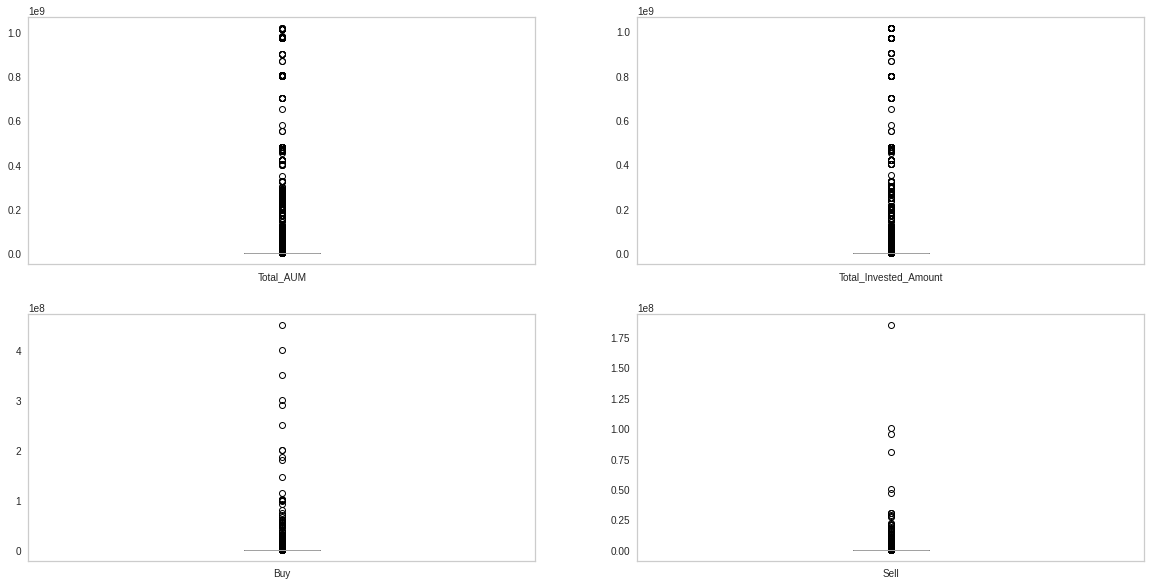

In [ ]:
# Checking Outliers with box plot
numerical_column = ['Total_AUM', 'Total_Invested_Amount', 'Buy', 'Sell']

fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(20,10))
for i,el in enumerate(numerical_column):
    a = df_dailytf.boxplot(el, ax=axes.flatten()[i],grid=False)
plt.show()

In [ ]:
# This is a dataset if you want to get insight by day
df_dailytf

,id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,...,Campuran_invested_amount,Campuran_transaction_amount,Total_AUM,Total_Invested_Amount,Total_Transaction,Buy,Sell,Net_Transaction,Day,Month
0,50701,2021-08-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10000000.0,0.0,10132277.0,10000000.0,0.0,0.0,0.0,0.0,Monday,August
1,50701,2021-08-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10000000.0,0.0,10206945.0,10000000.0,0.0,0.0,0.0,0.0,Tuesday,August
2,50701,2021-09-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10000000.0,0.0,9956556.0,10000000.0,0.0,0.0,0.0,0.0,Wednesday,September
3,50701,2021-09-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10000000.0,0.0,9914858.0,10000000.0,0.0,0.0,0.0,0.0,Thursday,September
4,50701,2021-09-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10000000.0,0.0,10016360.0,10000000.0,0.0,0.0,0.0,0.0,Friday,September
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158805,4164993,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,175081.0,175000.0,...,0.0,0.0,175081.0,175000.0,0.0,0.0,0.0,0.0,Thursday,September
158807,4165132,2021-09-30,0.0,0.0,0.0,10001.0,10000.0,0.0,0.0,0.0,...,0.0,0.0,10001.0,10000.0,0.0,0.0,0.0,0.0,Thursday,September
158808,4165630,2021-09-30,41625.0,40000.0,0.0,10001.0,10000.0,0.0,49869.0,50000.0,...,0.0,0.0,101495.0,100000.0,0.0,0.0,0.0,0.0,Thursday,September
158809,4165704,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,9987.0,10000.0,...,0.0,0.0,9987.0,10000.0,0.0,0.0,0.0,0.0,Thursday,September


In [ ]:
#copy dataset to prevant
df_test = df_dailytf.copy()
df_test1 = df_dailytf.copy()

,id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,...,Campuran_invested_amount,Campuran_transaction_amount,Total_AUM,Total_Invested_Amount,Total_Transaction,Buy,Sell,Net_Transaction,Day,Month
0,50701,2021-08-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10000000.0,0.0,10132277.0,10000000.0,0.0,0.0,0.0,0.0,Monday,August
1,50701,2021-08-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10000000.0,0.0,10206945.0,10000000.0,0.0,0.0,0.0,0.0,Tuesday,August
2,50701,2021-09-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10000000.0,0.0,9956556.0,10000000.0,0.0,0.0,0.0,0.0,Wednesday,September
3,50701,2021-09-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10000000.0,0.0,9914858.0,10000000.0,0.0,0.0,0.0,0.0,Thursday,September
4,50701,2021-09-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10000000.0,0.0,10016360.0,10000000.0,0.0,0.0,0.0,0.0,Friday,September
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158805,4164993,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,175081.0,175000.0,...,0.0,0.0,175081.0,175000.0,0.0,0.0,0.0,0.0,Thursday,September
158807,4165132,2021-09-30,0.0,0.0,0.0,10001.0,10000.0,0.0,0.0,0.0,...,0.0,0.0,10001.0,10000.0,0.0,0.0,0.0,0.0,Thursday,September
158808,4165630,2021-09-30,41625.0,40000.0,0.0,10001.0,10000.0,0.0,49869.0,50000.0,...,0.0,0.0,101495.0,100000.0,0.0,0.0,0.0,0.0,Thursday,September
158809,4165704,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,9987.0,10000.0,...,0.0,0.0,9987.0,10000.0,0.0,0.0,0.0,0.0,Thursday,September


In [ ]:
df_test['Total_Transaction'].replace(0, np.nan, inplace=True)

### Aggregate Data

In [ ]:
# Because we cannot aggregat Total AUM and Total Invested Amount on end of period, We dicide to get last date, last _AUM and last_invested_aum
# This is dataset for end of periode by user
df_test = df_test.groupby('id',as_index=False).agg({'date':'max', 
                                        'Saham_AUM':'last',
                                        'Saham_invested_amount' :'last',
                                        'Saham_transaction_amount' :'sum',
                                        'Pasar_Uang_AUM' :'last',
                                        'Pasar_Uang_invested_amount' :'last',
                                        'Pasar_Uang_transaction_amount' :'sum',
                                        'Pendapatan_Tetap_AUM' :'last',
                                        'Pendapatan_Tetap_invested_amount' :'last',
                                        'Pendapatan_Tetap_transaction_amount' :'sum',
                                        'Campuran_AUM' :'last',
                                        'Campuran_invested_amount' :'last',
                                        'Campuran_transaction_amount' :'sum',
                                        'Total_AUM':'last',
                                        'Total_Invested_Amount' : 'last',
                                        'Total_Transaction': 'count',
                                        'Buy': 'sum',
                                        'Sell' :'sum',
                                        'Net_Transaction' : 'sum'})

df_test = df_test.rename(columns={'date':'transaction_date'})
df_test = df_test.rename(columns={'user_id':'id'})
df_test.head()

,id,transaction_date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount,Total_AUM,Total_Invested_Amount,Total_Transaction,Buy,Sell,Net_Transaction
0,50701,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9943587.0,10000000.0,0.0,9943587.0,10000000.0,0,0.0,0.0,0.0
1,50961,2021-09-30,2063909.0,2000000.0,1300000.0,700603.0,700000.0,600000.0,1398998.0,1400000.0,1200000.0,0.0,0.0,0.0,4163510.0,4100000.0,2,3100000.0,0.0,3100000.0
2,53759,2021-09-30,73179.0,70000.0,0.0,10027.0,10000.0,0.0,20109.0,20000.0,0.0,0.0,0.0,0.0,103315.0,100000.0,0,0.0,0.0,0.0
3,54759,2021-09-30,0.0,0.0,0.0,12049049.0,12000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,0.0,12049049.0,12000000.0,1,2000000.0,0.0,2000000.0
4,61414,2021-08-13,0.0,0.0,-10000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,10000.0,-10000.0


In [ ]:
# Dataset aggregate by Montly
df_month = df_test1.groupby(['id','Month'],as_index=False).agg({'date':'max', 
                                        'Saham_AUM':'last',
                                        'Saham_invested_amount' :'last',
                                        'Saham_transaction_amount' :'sum',
                                        'Pasar_Uang_AUM' :'last',
                                        'Pasar_Uang_invested_amount' :'last',
                                        'Pasar_Uang_transaction_amount' :'sum',
                                        'Pendapatan_Tetap_AUM' :'last',
                                        'Pendapatan_Tetap_invested_amount' :'last',
                                        'Pendapatan_Tetap_transaction_amount' :'sum',
                                        'Campuran_AUM' :'last',
                                        'Campuran_invested_amount' :'last',
                                        'Campuran_transaction_amount' :'sum',
                                        'Total_AUM':'last',
                                        'Total_Invested_Amount' : 'last',
                                        'Total_Transaction': 'count',
                                        'Buy': 'sum',
                                        'Sell' :'sum',
                                        'Net_Transaction' : 'sum'})


df_month.head()

,id,Month,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,...,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount,Total_AUM,Total_Invested_Amount,Total_Transaction,Buy,Sell,Net_Transaction
0,50701,August,2021-08-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,10206945.0,10000000.0,0.0,10206945.0,10000000.0,2,0.0,0.0,0.0
1,50701,September,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9943587.0,10000000.0,0.0,9943587.0,10000000.0,22,0.0,0.0,0.0
2,50961,August,2021-08-31,716057.0,700000.0,0.0,100049.0,100000.0,0.0,200117.0,...,0.0,0.0,0.0,0.0,1016223.0,1000000.0,1,0.0,0.0,0.0
3,50961,September,2021-09-30,2063909.0,2000000.0,1300000.0,700603.0,700000.0,600000.0,1398998.0,...,1200000.0,0.0,0.0,0.0,4163510.0,4100000.0,22,3100000.0,0.0,3100000.0
4,53759,August,2021-08-31,70839.0,70000.0,0.0,10006.0,10000.0,0.0,20066.0,...,0.0,0.0,0.0,0.0,100911.0,100000.0,6,0.0,0.0,0.0


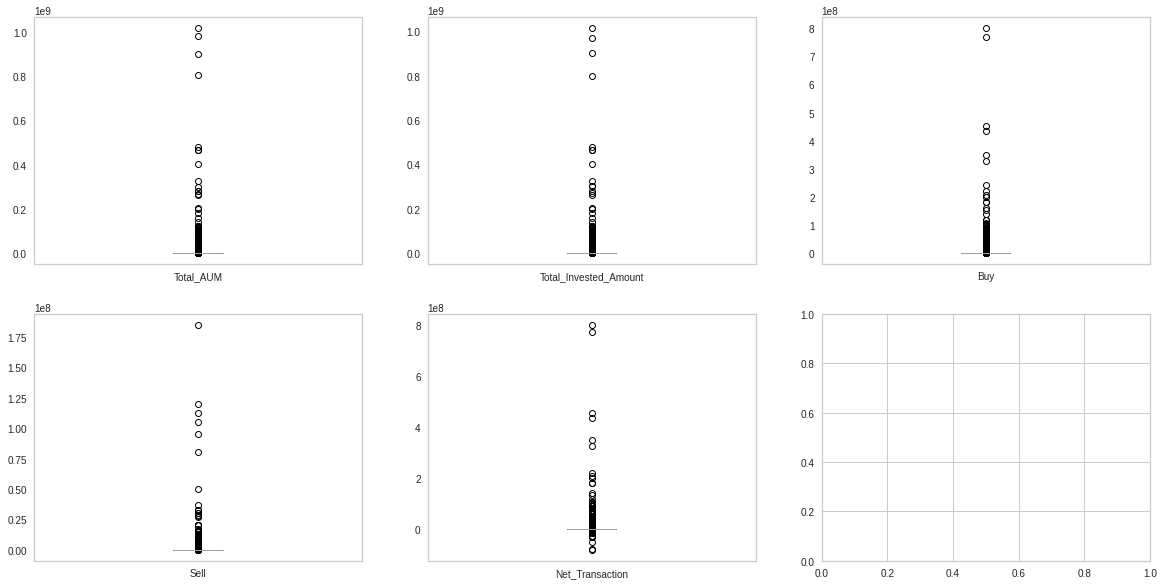

In [ ]:
# Checking outlier by dataset end of periode
numerical_column = ['Total_AUM', 'Total_Invested_Amount', 'Buy', 'Sell','Net_Transaction']

fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(20,10))
for i,el in enumerate(numerical_column):
    a = df_test.boxplot(el, ax=axes.flatten()[i],grid=False)
plt.show()

In [ ]:
# Save data end of periode transaction by user
df_test.to_csv('EndofPeriode_Clean.csv')

# Save data daily transaction
df_dailytf.to_csv('DailyTrasaction_Clean.csv')

# Merge Data/ Join Data

We decide to join or merge between Daily transaction and user dataset because we need datamart clean for further analyzing

**We have 2 data set for analyzing**

1.   Data Set for end of periode transaction
2.   Data Set for Daily Transaction



In [ ]:
# This data join between data_user and data_end of periode
dfNew = df_user.merge(df_test, how='inner',left_on='user_id', right_on='id')
dfNew

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,user_income_source,id,transaction_date,Saham_AUM,...,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount,Total_AUM,Total_Invested_Amount,Total_Transaction,Buy,Sell,Net_Transaction
0,3816789,2021-08-12 07:19:32,Female,53,IRT,75,Gaji,3816789,2021-09-30,297141.0,...,0.0,0.0,0.0,0.0,608049.0,600000.0,1,100000.0,0.0,100000.0
1,3802293,2021-08-15 09:31:24,Female,47,PNS,750,Gaji,3802293,2021-09-30,9232900.0,...,2030000.0,0.0,0.0,0.0,13816490.0,13500000.0,2,8500000.0,0.0,8500000.0
2,3049927,2021-08-29 03:56:26,Male,53,Swasta,5,Gaji,3049927,2021-09-30,41545.0,...,0.0,910285.0,899000.0,149000.0,1011752.0,999000.0,1,149000.0,0.0,149000.0
3,3836491,2021-08-18 11:32:25,Male,59,Others,5,Lainnya,3836491,2021-09-30,0.0,...,0.0,0.0,0.0,0.0,10012.0,10000.0,0,0.0,0.0,0.0
4,3783302,2021-09-14 08:16:54,Male,57,Swasta,75,Gaji,3783302,2021-09-30,0.0,...,-419569.0,0.0,0.0,0.0,107322.0,110431.0,2,1000000.0,1889569.0,-889569.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7756,3773859,2021-08-06 13:10:06,Male,49,Swasta,250,Lainnya,3773859,2021-09-21,0.0,...,-40000.0,0.0,0.0,0.0,0.0,0.0,6,350000.0,450000.0,-100000.0
7757,3798265,2021-08-09 10:42:53,Female,49,IRT,25,Keuntungan Bisnis,3798265,2021-08-25,0.0,...,-40000.0,0.0,0.0,0.0,0.0,0.0,3,25000.0,125000.0,-100000.0
7758,3670811,2021-08-02 11:11:03,Male,49,Swasta,75,Gaji,3670811,2021-09-30,208469.0,...,25000.0,0.0,0.0,0.0,434258.0,435000.0,5,240000.0,0.0,240000.0
7759,3812221,2021-08-11 17:33:05,Male,49,PNS,250,Gaji,3812221,2021-08-25,0.0,...,-30000.0,0.0,0.0,0.0,0.0,0.0,2,150000.0,250000.0,-100000.0


In [ ]:
# This data join between data_user and daily_transaction
dfNew1 = df_user.merge(df_dailytf, how='inner',left_on='user_id', right_on='id')
dfNew1

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,user_income_source,id,date,Saham_AUM,...,Campuran_invested_amount,Campuran_transaction_amount,Total_AUM,Total_Invested_Amount,Total_Transaction,Buy,Sell,Net_Transaction,Day,Month
0,3816789,2021-08-12 07:19:32,Female,53,IRT,75,Gaji,3816789,2021-08-17,189109.0,...,0.0,0.0,499205.0,500000.0,0.0,0.0,0.0,0.0,Tuesday,August
1,3816789,2021-08-12 07:19:32,Female,53,IRT,75,Gaji,3816789,2021-08-18,188542.0,...,0.0,0.0,498963.0,500000.0,0.0,0.0,0.0,0.0,Wednesday,August
2,3816789,2021-08-12 07:19:32,Female,53,IRT,75,Gaji,3816789,2021-08-19,185228.0,...,0.0,0.0,495682.0,500000.0,0.0,0.0,0.0,0.0,Thursday,August
3,3816789,2021-08-12 07:19:32,Female,53,IRT,75,Gaji,3816789,2021-08-20,184354.0,...,0.0,0.0,494563.0,500000.0,0.0,0.0,0.0,0.0,Friday,August
4,3816789,2021-08-12 07:19:32,Female,53,IRT,75,Gaji,3816789,2021-08-23,186365.0,...,0.0,0.0,496727.0,500000.0,0.0,0.0,0.0,0.0,Monday,August
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128218,3881981,2021-08-22 19:27:20,Female,49,Pengusaha,250,Keuntungan Bisnis,3881981,2021-09-24,9900685.0,...,0.0,0.0,61002441.0,61100000.0,0.0,0.0,0.0,0.0,Friday,September
128219,3881981,2021-08-22 19:27:20,Female,49,Pengusaha,250,Keuntungan Bisnis,3881981,2021-09-27,9911149.0,...,0.0,0.0,61037798.0,61100000.0,0.0,0.0,0.0,0.0,Monday,September
128220,3881981,2021-08-22 19:27:20,Female,49,Pengusaha,250,Keuntungan Bisnis,3881981,2021-09-28,10018447.0,...,0.0,0.0,61150187.0,61100000.0,0.0,0.0,0.0,0.0,Tuesday,September
128221,3881981,2021-08-22 19:27:20,Female,49,Pengusaha,250,Keuntungan Bisnis,3881981,2021-09-29,20161402.0,...,0.0,0.0,71279131.0,71100000.0,10000000.0,10000000.0,0.0,10000000.0,Wednesday,September


# EDA</br>
Explore Data Analysis


### Descriptive statistic

In [ ]:
# Descriptive Statistic
dfNew[['user_age','user_income_range', 'Total_AUM', 'Total_Invested_Amount', 'Buy', 'Sell']].describe()

,user_age,user_income_range,Total_AUM,Total_Invested_Amount,Buy,Sell
count,128223.000000,128223.000000,1.282230e+05,1.282230e+05,1.282230e+05,1.282230e+05
mean,27.698260,53.531036,3.021234e+06,3.025105e+06,9.636202e+04,1.858263e+04
std,8.728269,101.522434,2.772545e+07,2.768035e+07,3.029578e+06,7.868078e+05
min,17.000000,5.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,21.000000,5.000000,9.997000e+04,1.000000e+05,0.000000e+00,0.000000e+00
50%,25.000000,25.000000,2.002460e+05,2.000000e+05,0.000000e+00,0.000000e+00
75%,31.000000,75.000000,7.245390e+05,7.250000e+05,0.000000e+00,0.000000e+00
max,83.000000,1000.000000,1.016171e+09,1.012200e+09,4.500000e+08,1.850000e+08


**From this table, we know that active user in this platform having average age about 27 years Old**

### Analyzing using Visualization

#### To know about gender in active user

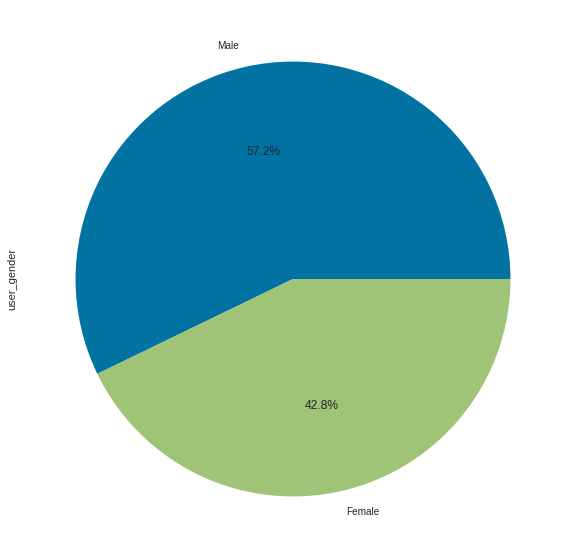

In [ ]:
# To know about gender in active user
fig = plt.figure(figsize=(10,10))
gender = dfNew['user_gender'].value_counts()
gender.plot(kind='pie', autopct='%0.1f%%')

#### To know about pattern frequency sell by day

,Day,Sell
0,Friday,174
1,Monday,296
2,Thursday,194
3,Tuesday,181
4,Wednesday,177


[Text(0.5, 1.0, 'Frequency Sell by Day')]

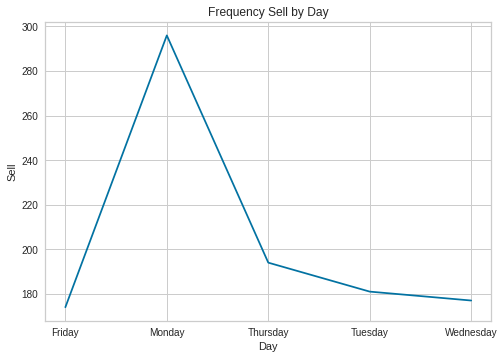

In [ ]:
# To know about pattern in Transaction (Sell and Buy)
sell = dfNew1.groupby(['Day'],as_index=False)['Sell'].nunique()
display(sell)
sns.lineplot(x='Day', y='Sell',data = sell, ci=None).set(title='Frequency Sell by Day')


#### To know about pattern average total sell by day

,Day,Sell
0,Friday,13986.200146
1,Monday,25514.642884
2,Thursday,15811.813825
3,Tuesday,25508.471995
4,Wednesday,12947.230482


[Text(0.5, 1.0, 'Average Total Sell by Day')]

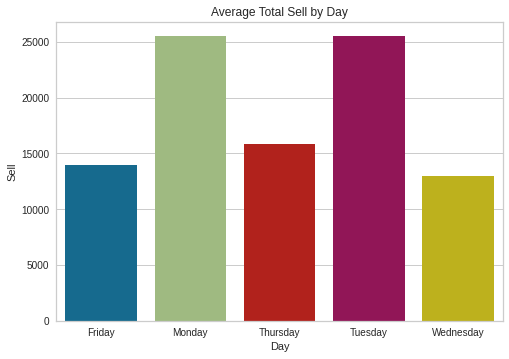

In [ ]:
sell1 = dfNew1.groupby(['Day'],as_index=False)['Sell'].mean()
display(sell1)
sns.barplot(x='Day', y='Sell',data = sell1, ci=None).set(title='Average Total Sell by Day')

#### To know about pattern frequency Buy by day

,Day,Buy
0,Friday,241
1,Monday,204
2,Thursday,289
3,Tuesday,208
4,Wednesday,323


[Text(0.5, 1.0, 'Frequency Buy by Day')]

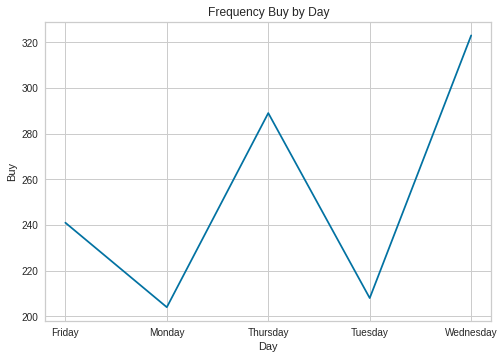

In [ ]:
# How Many users do transactions on any given day ?
buy = dfNew1.groupby(['Day'],as_index=False)['Buy'].nunique()
display(buy)
sns.lineplot(x='Day', y='Buy',data = buy, ci=None).set(title='Frequency Buy by Day')

#### To know about pattern average total buy by day

,Day,Buy
0,Friday,110914.331655
1,Monday,123595.987009
2,Thursday,78025.535613
3,Tuesday,74585.767103
4,Wednesday,98762.708516


[Text(0.5, 1.0, 'Average Buy by Day')]

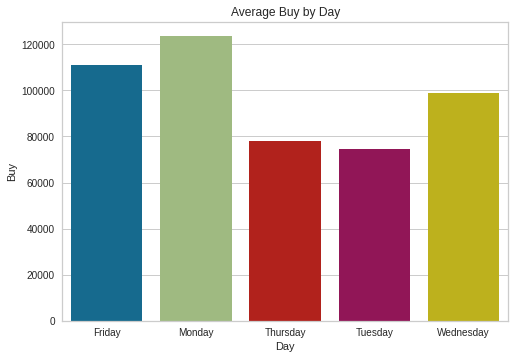

In [ ]:
buy1 = dfNew1.groupby(['Day'],as_index=False)['Buy'].mean()
display(buy1)
sns.barplot(x='Day', y='Buy',data = buy1, ci=None).set(title='Average Buy by Day')

#### To know about average AUM each user occupation

,user_occupation,Total_AUM
6,Pensiunan,2.561216e+07
5,Pengusaha,1.263832e+07
1,IRT,8.199853e+06
7,Swasta,4.627241e+06
3,PNS,3.257365e+06
2,Others,2.283823e+06
4,Pelajar,1.314102e+06
8,TNI/Polisi,8.059112e+05
0,Guru,5.377998e+05


[Text(0.5, 1.0, 'Average AUM')]

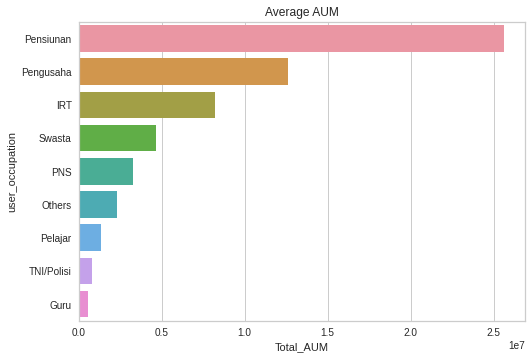

In [ ]:
# to know about average AUM each user occupation
user_occupation = dfNew1.groupby(['user_occupation'],as_index=False)['Total_AUM'].mean()
user_occupation =  user_occupation.sort_values('Total_AUM', ascending = False)
display(user_occupation)
sns.barplot(x='Total_AUM', y='user_occupation',data = user_occupation, orient='h', ci=None).set(title='Average AUM')


#### Total Active User

In [ ]:
#Total Acive User
dfNew1['user_id'].nunique()

7761

#### What is average current profit of each dataset user?

In [ ]:
# What is average current profit of each dataset user?
total_user = dfNew['user_id'].nunique()
total_transaction = dfNew['Net_Transaction'].sum() 
average_profit_user = total_transaction/total_user
display(average_profit_user)


1285028.557531246

In [ ]:
# How Many users do transactions on any given day ?
user_day = dfNew1.groupby(['Day'],as_index=False)['Buy'].nunique()
display(user_day)

,Day,Buy
0,Friday,241
1,Monday,204
2,Thursday,289
3,Tuesday,208
4,Wednesday,323


In [ ]:
# What is the average AUM Per user

#avg aum each user
avg_AUM = dfNew1.groupby(['user_id'],as_index=False)['Total_AUM'].mean()
print(avg_AUM)


      user_id     Total_AUM
0       50701  9.960727e+06
1       50961  2.077570e+06
2       53759  1.007324e+05
3       54759  1.010642e+07
4       61414  6.718000e+03
...       ...           ...
7756  4164993  1.750810e+05
7757  4165132  1.000100e+04
7758  4165630  1.014950e+05
7759  4165704  9.987000e+03
7760  4165830  1.000100e+04

[7761 rows x 2 columns]


In [ ]:
#average AUM Per user
total_user = dfNew['user_id'].nunique()
total_transaction = dfNew['Total_AUM'].sum() 
average_AUM_user = total_transaction/total_user
display(average_AUM_user)

49915169.726710476

,Month,Sell
0,August,26586.463777
1,September,16411.719814


[Text(0.5, 1.0, 'Average Total Sell by Month')]

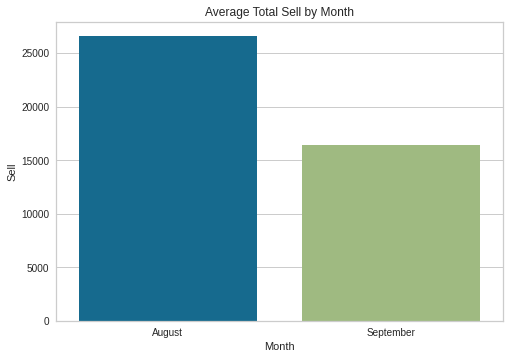

In [ ]:
sell2 = dfNew1.groupby(['Month'],as_index=False)['Sell'].mean()
display(sell2)
sns.barplot(x='Month', y='Sell',data = sell2, ci=None).set(title='Average Total Sell by Month')

,Month,Sell
0,August,184
1,September,652


[Text(0.5, 1.0, 'Frequency Sell by Month')]

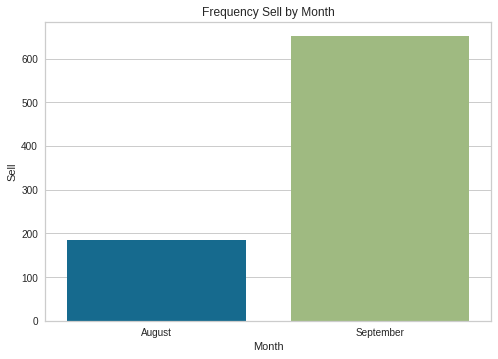

In [ ]:
sell3 = dfNew1.groupby(['Month'],as_index=False)['Sell'].nunique()
display(sell3)
sns.barplot(x='Month', y='Sell',data = sell3, ci=None).set(title='Frequency Sell by Month')

,Month,Buy
0,August,117667.776373
1,September,90583.177554


[Text(0.5, 1.0, 'Average Total Buy by Month')]

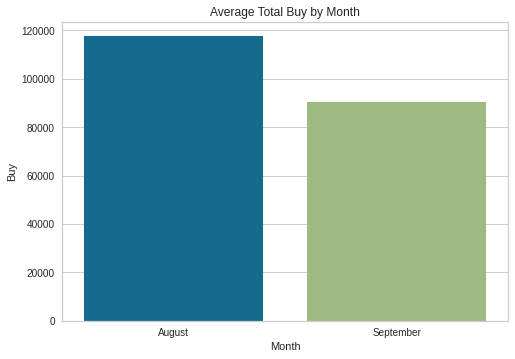

In [ ]:
buy3 = dfNew1.groupby(['Month'],as_index=False)['Buy'].mean()
display(buy3)
sns.barplot(x='Month', y='Buy',data = buy3, ci=None).set(title='Average Total Buy by Month')

,Month,Buy
0,August,264
1,September,683


[Text(0.5, 1.0, 'Frequency Buy by Month')]

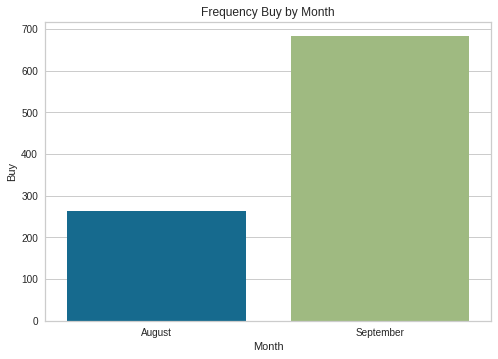

In [ ]:
buy2 = dfNew1.groupby(['Month'],as_index=False)['Buy'].nunique()
display(buy2)
sns.barplot(x='Month', y='Buy',data = buy2, ci=None).set(title='Frequency Buy by Month')

In [ ]:
mutual = dfNew.groupby(['Campuran_invested_amount'],as_index=False)['user_id'].nunique()
display(mutual)
# sns.barplot(x='Month', y='Buy',data = buy2, ci=None).set(title='Frequency Buy by Month')

,Campuran_invested_amount,user_id
0,0.0,7625
1,50000.0,4
2,100000.0,34
3,150000.0,1
4,200000.0,10
...,...,...
83,52000000.0,1
84,54000000.0,1
85,100000000.0,1
86,250000000.0,1


#### 123

In [ ]:
fig = plt.figure(figsize=(20, 5))

fig.suptitle('Daily Transaction Count', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Transaction Count', fontsize=20)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)

sns.lineplot(data=dfm, x="date", y="vals", hue="cols")
plt.show()

# Clustering Analysis

*  In this case, we decide using K-means method for clustering analysis because we want clustering based profiling user, but for further analysis we want to try using RFM segementation based on behaviour customer 




### Import Libraries For Clustering Analysis

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import cluster
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

### Data Preparation For Clustering

In [ ]:
# We decide use dataset end of periode
df = dfNew.copy()

# Because in this case, we want to cluster based ' Active User Past 30 Days ' Then decide make filter first 
# Filter data between two dates
df= df.loc[(df['transaction_date'] >= '2021-09-01') & (df['transaction_date'] <= '2021-09-30')]

# Delete columns 'id' because that same with user_id
df = df.drop('id', axis=1)

# Make sure that raw data is safe
df_cluster = df.copy()
df_cluster

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,user_income_source,transaction_date,Saham_AUM,Saham_invested_amount,...,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount,Total_AUM,Total_Invested_Amount,Total_Transaction,Buy,Sell,Net_Transaction
0,3816789,2021-08-12 07:19:32,Female,53,IRT,75,Gaji,2021-09-30,297141.0,290000.0,...,0.0,0.0,0.0,0.0,608049.0,600000.0,1,100000.0,0.0,100000.0
1,3802293,2021-08-15 09:31:24,Female,47,PNS,750,Gaji,2021-09-30,9232900.0,8920000.0,...,2030000.0,0.0,0.0,0.0,13816490.0,13500000.0,2,8500000.0,0.0,8500000.0
2,3049927,2021-08-29 03:56:26,Male,53,Swasta,5,Gaji,2021-09-30,41545.0,40000.0,...,0.0,910285.0,899000.0,149000.0,1011752.0,999000.0,1,149000.0,0.0,149000.0
3,3836491,2021-08-18 11:32:25,Male,59,Others,5,Lainnya,2021-09-30,0.0,0.0,...,0.0,0.0,0.0,0.0,10012.0,10000.0,0,0.0,0.0,0.0
4,3783302,2021-09-14 08:16:54,Male,57,Swasta,75,Gaji,2021-09-30,0.0,0.0,...,-419569.0,0.0,0.0,0.0,107322.0,110431.0,2,1000000.0,1889569.0,-889569.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7754,3965617,2021-09-03 09:11:34,Female,49,IRT,250,Keuntungan Bisnis,2021-09-30,1170156.0,1120000.0,...,340000.0,0.0,0.0,0.0,2051500.0,2000000.0,1,1000000.0,0.0,1000000.0
7755,3765807,2021-08-05 23:30:18,Male,49,Pengusaha,750,Keuntungan Bisnis,2021-09-30,21578481.0,21130000.0,...,6140000.0,0.0,0.0,0.0,31478501.0,31000000.0,17,31040000.0,1250000.0,29790000.0
7756,3773859,2021-08-06 13:10:06,Male,49,Swasta,250,Lainnya,2021-09-21,0.0,0.0,...,-40000.0,0.0,0.0,0.0,0.0,0.0,6,350000.0,450000.0,-100000.0
7758,3670811,2021-08-02 11:11:03,Male,49,Swasta,75,Gaji,2021-09-30,208469.0,210000.0,...,25000.0,0.0,0.0,0.0,434258.0,435000.0,5,240000.0,0.0,240000.0


In [ ]:
# Because we want cluster, and delete not numeric coloumn
df_cluster = df_cluster.drop(['user_id','Saham_AUM','Pasar_Uang_AUM','Pendapatan_Tetap_AUM','Campuran_AUM','registration_import_datetime','user_gender','transaction_date','Buy','user_occupation','user_income_source','Sell','Total_AUM'], axis = 1)
df_cluster

,user_age,user_income_range,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_invested_amount,Campuran_transaction_amount,Total_Invested_Amount,Total_Transaction,Net_Transaction
0,53,75,290000.0,100000.0,40000.0,0.0,270000.0,0.0,0.0,0.0,600000.0,1,100000.0
1,47,750,8920000.0,5620000.0,1350000.0,850000.0,3230000.0,2030000.0,0.0,0.0,13500000.0,2,8500000.0
2,53,5,40000.0,0.0,10000.0,0.0,50000.0,0.0,899000.0,149000.0,999000.0,1,149000.0
3,59,5,0.0,0.0,10000.0,0.0,0.0,0.0,0.0,0.0,10000.0,0,0.0
4,57,75,0.0,-370000.0,0.0,-100000.0,110431.0,-419569.0,0.0,0.0,110431.0,2,-889569.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7754,49,250,1120000.0,560000.0,200000.0,100000.0,680000.0,340000.0,0.0,0.0,2000000.0,1,1000000.0
7755,49,750,21130000.0,20880000.0,3020000.0,2770000.0,6850000.0,6140000.0,0.0,0.0,31000000.0,17,29790000.0
7756,49,250,0.0,-50000.0,0.0,-10000.0,0.0,-40000.0,0.0,0.0,0.0,6,-100000.0
7758,49,75,210000.0,110000.0,130000.0,105000.0,95000.0,25000.0,0.0,0.0,435000.0,5,240000.0


### Data Normalize by MinMaxScaller

Decision for Deleting and why keep safe the column
*   I use several columns that can represent a product from a mutual fund, because from AUM and the invested amount each mutual product is almost the same as representing a product, so I choose to use the invested amount, because I think that the invested amount is the value someone spends on a product and the result can make efficient to get better cluster


In [ ]:
# Make sure to use numerical column for clustering and for next step is minmax scaller
numerical_column = ['user_age', 'user_income_range', 'Saham_invested_amount',
       'Saham_transaction_amount','Pasar_Uang_invested_amount', 'Pasar_Uang_transaction_amount',
       'Pendapatan_Tetap_invested_amount',
       'Pendapatan_Tetap_transaction_amount', 
       'Campuran_invested_amount', 'Campuran_transaction_amount',
       'Total_Invested_Amount', 'Total_Transaction', 'Net_Transaction']

# Min Max Scaller for nomalize data
scaler = MinMaxScaler()
df_cluster[numerical_column] = scaler.fit_transform(df_cluster[numerical_column])
df_cluster

,user_age,user_income_range,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_invested_amount,Campuran_transaction_amount,Total_Invested_Amount,Total_Transaction,Net_Transaction
0,0.545455,0.070352,0.004690,0.083785,0.000040,0.187336,0.000278,0.091012,0.000000,0.37037,0.000593,0.033333,0.091901
1,0.454545,0.748744,0.144243,0.174470,0.001334,0.188928,0.003330,0.093322,0.000000,0.37037,0.013337,0.066667,0.101449
2,0.545455,0.000000,0.000647,0.082142,0.000010,0.187336,0.000052,0.091012,0.002997,0.37221,0.000987,0.033333,0.091957
3,0.636364,0.000000,0.000000,0.082142,0.000010,0.187336,0.000000,0.091012,0.000000,0.37037,0.000010,0.000000,0.091787
4,0.606061,0.070352,0.000000,0.076064,0.000000,0.187149,0.000114,0.090535,0.000000,0.37037,0.000109,0.066667,0.090776
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7754,0.484848,0.246231,0.018111,0.091342,0.000198,0.187523,0.000701,0.091399,0.000000,0.37037,0.001976,0.033333,0.092924
7755,0.484848,0.748744,0.341688,0.425168,0.002984,0.192525,0.007062,0.097998,0.000000,0.37037,0.030626,0.566667,0.125649
7756,0.484848,0.246231,0.000000,0.081321,0.000000,0.187317,0.000000,0.090967,0.000000,0.37037,0.000000,0.200000,0.091674
7758,0.484848,0.070352,0.003396,0.083949,0.000128,0.187533,0.000098,0.091041,0.000000,0.37037,0.000430,0.166667,0.092060


### Looking For N Clusters
We decide for using elbow method and silhouette score plot methode to get the best n cluster and to compare with each other

#### Elbow Method 

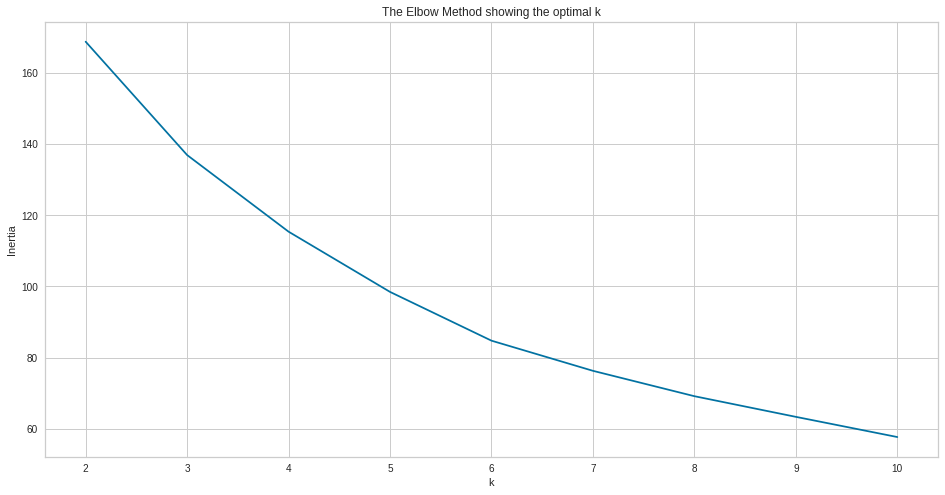

In [ ]:
distortions = []
K = range(2,11)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k)
    kmeanModel.fit(df_cluster)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

It seems the Elbow is formed at n_cluster = 3.

#### Silhouette Score Plot Method

For k=2, the average silhouette score is 0.5287134864544127
For k=3, the average silhouette score is 0.5240558027102972
For k=4, the average silhouette score is 0.39990022337615505
For k=5, the average silhouette score is 0.3990748661091772
For k=6, the average silhouette score is 0.4203857938234586
For k=7, the average silhouette score is 0.4229684781564968
For k=8, the average silhouette score is 0.3488616889245128
For k=9, the average silhouette score is 0.3694206723746146
For k=10, the average silhouette score is 0.3717716425349744


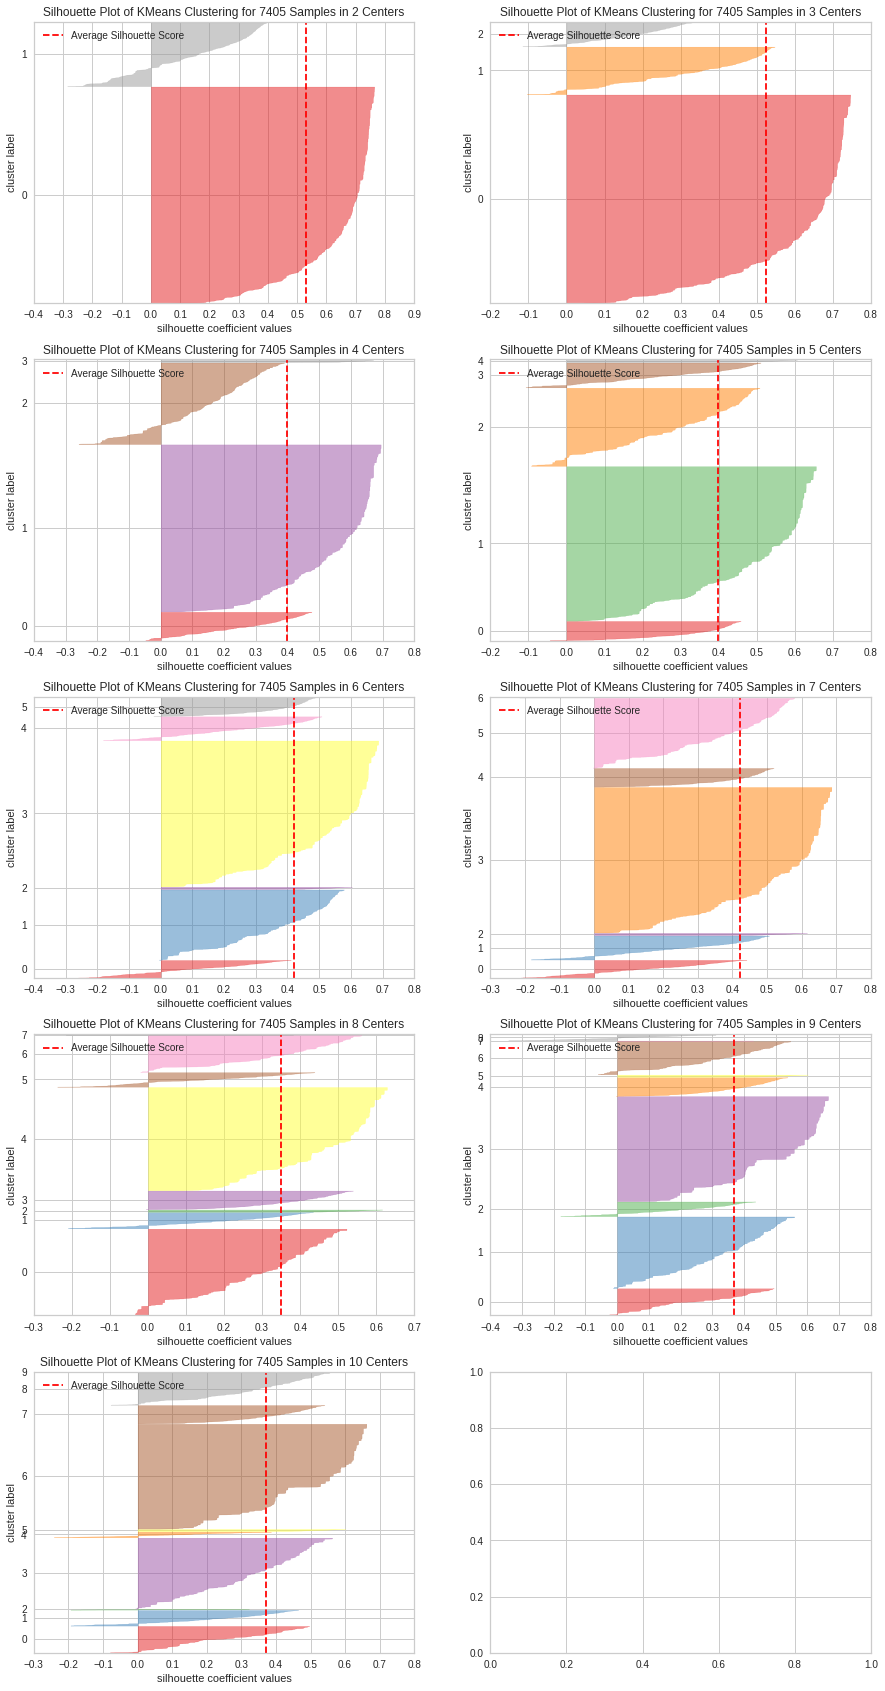

In [ ]:
# Silhouette score plot
K = range(2,11)
max_K = max(K)
fig, ax = plt.subplots(int(np.ceil(max_K/2)), 2, figsize = (15,30))

for n_clusters in K:
  kmeanModel = KMeans(n_clusters)

  q, mod = divmod(n_clusters,2)
  sil = SilhouetteVisualizer(kmeanModel, is_fitted = False, ax = ax[q-1][mod])
  sil.fit(df_cluster)
  sil.finalize()
  print(f"For k={n_clusters}, the average silhouette score is {sil.silhouette_score_}")

It seems like the k=3 has the highest average silhouette score, and the most balanced set of clusters

### Interpretation Cluster Result

#### K_Means Method

In [ ]:
cluster_model = cluster.KMeans(n_clusters=3)
cluster_model.fit(df_cluster)
cluster_label = cluster_model.labels_
df['cluster'] = cluster_label
df

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,user_income_source,transaction_date,Saham_AUM,Saham_invested_amount,...,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount,Total_AUM,Total_Invested_Amount,Total_Transaction,Buy,Sell,Net_Transaction,cluster
0,3816789,2021-08-12 07:19:32,Female,53,IRT,75,Gaji,2021-09-30,297141.0,290000.0,...,0.0,0.0,0.0,608049.0,600000.0,1,100000.0,0.0,100000.0,1
1,3802293,2021-08-15 09:31:24,Female,47,PNS,750,Gaji,2021-09-30,9232900.0,8920000.0,...,0.0,0.0,0.0,13816490.0,13500000.0,2,8500000.0,0.0,8500000.0,2
2,3049927,2021-08-29 03:56:26,Male,53,Swasta,5,Gaji,2021-09-30,41545.0,40000.0,...,910285.0,899000.0,149000.0,1011752.0,999000.0,1,149000.0,0.0,149000.0,1
3,3836491,2021-08-18 11:32:25,Male,59,Others,5,Lainnya,2021-09-30,0.0,0.0,...,0.0,0.0,0.0,10012.0,10000.0,0,0.0,0.0,0.0,1
4,3783302,2021-09-14 08:16:54,Male,57,Swasta,75,Gaji,2021-09-30,0.0,0.0,...,0.0,0.0,0.0,107322.0,110431.0,2,1000000.0,1889569.0,-889569.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7754,3965617,2021-09-03 09:11:34,Female,49,IRT,250,Keuntungan Bisnis,2021-09-30,1170156.0,1120000.0,...,0.0,0.0,0.0,2051500.0,2000000.0,1,1000000.0,0.0,1000000.0,1
7755,3765807,2021-08-05 23:30:18,Male,49,Pengusaha,750,Keuntungan Bisnis,2021-09-30,21578481.0,21130000.0,...,0.0,0.0,0.0,31478501.0,31000000.0,17,31040000.0,1250000.0,29790000.0,2
7756,3773859,2021-08-06 13:10:06,Male,49,Swasta,250,Lainnya,2021-09-21,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,6,350000.0,450000.0,-100000.0,1
7758,3670811,2021-08-02 11:11:03,Male,49,Swasta,75,Gaji,2021-09-30,208469.0,210000.0,...,0.0,0.0,0.0,434258.0,435000.0,5,240000.0,0.0,240000.0,1


In [ ]:
count_cluster = df.groupby('cluster',as_index= True)['user_id'].count()
count_cluster

cluster
0    5519
1    1281
2     605
Name: user_id, dtype: int64

In [ ]:
gender_cluster = df.groupby(['cluster','user_gender'],as_index= False)['user_id'].count()
gender_cluster = gender_cluster.merge(count_cluster, how = 'left', on ='cluster')
gender_cluster['pct'] = gender_cluster['user_id_x']/gender_cluster['user_id_y']
gender_cluster

,cluster,user_gender,user_id_x,user_id_y,pct
0,0,Female,2148,5519,0.389201
1,0,Male,3371,5519,0.610799
2,1,Female,535,1281,0.417642
3,1,Male,746,1281,0.582358
4,2,Female,250,605,0.413223
5,2,Male,355,605,0.586777


In [ ]:
occu = df.groupby(['cluster', 'user_occupation'], as_index=False)['user_id'].count()
occu = occu.merge(count_cluster, how = 'left', on ='cluster')
occu['pct'] = occu['user_id_x']/occu['user_id_y']
occu

,cluster,user_occupation,user_id_x,user_id_y,pct
0,0,Guru,33,5519,0.005979
1,0,IRT,174,5519,0.031527
2,0,Others,575,5519,0.104186
3,0,PNS,21,5519,0.003805
4,0,Pelajar,3821,5519,0.692336
5,0,Pengusaha,121,5519,0.021924
6,0,Swasta,762,5519,0.138068
7,0,TNI/Polisi,12,5519,0.002174
8,1,Guru,22,1281,0.017174
9,1,IRT,207,1281,0.161593


,cluster,Saham_invested_amount,Pasar_Uang_invested_amount,Pendapatan_Tetap_invested_amount,Campuran_invested_amount
0,0,1.964903e+05,3.705294e+05,4.310427e+05,74887.316905
1,1,5.771977e+05,9.729641e+05,2.469269e+06,458653.423888
2,2,1.588361e+06,5.276788e+06,8.088896e+06,939279.654545


[Text(0.5, 1.0, 'Cluster by Mutual Fund')]

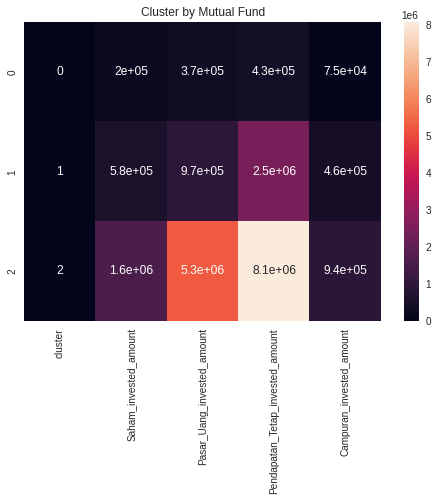

In [ ]:
#Characteristic each mutual fund
df_stock = df.groupby(['cluster'], as_index=False).agg({'Saham_invested_amount':'mean',
                                             'Pasar_Uang_invested_amount' : 'mean',
                                             'Pendapatan_Tetap_invested_amount':'mean',
                                             'Campuran_invested_amount' : 'mean'})
display(df_stock)
sns.heatmap(data = df_stock,annot=True).set(title='Cluster by Mutual Fund')

In [ ]:
#Characteristic Cluster
df.to_csv('EndofPeriode_Clean.csv')
character =df.groupby(['cluster']).mean()
character

,user_id,user_age,user_income_range,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,...,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount,Total_AUM,Total_Invested_Amount,Total_Transaction,Buy,Sell,Net_Transaction
cluster,,,,,,,,,,,,,,,,,,,,,
0,3.639367e+06,23.541765,22.194238,2.031929e+05,1.964903e+05,69445.692336,3.715161e+05,3.705294e+05,1.485088e+05,4.314934e+05,...,1.745716e+05,72415.963762,74887.316905,12964.577278,1.078618e+06,1.072950e+06,1.335568,6.041340e+05,198643.337742,4.054907e+05
1,3.734828e+06,41.430913,49.281811,5.949271e+05,5.771977e+05,240360.576893,9.753578e+05,9.729641e+05,4.554740e+05,2.475418e+06,...,1.318365e+06,440078.166276,458653.423888,72343.900078,4.485781e+06,4.478084e+06,1.574551,2.476723e+06,390179.604215,2.086544e+06
2,3.648198e+06,33.909091,306.859504,1.639094e+06,1.588361e+06,793695.740496,5.293527e+06,5.276788e+06,2.195183e+06,8.111854e+06,...,5.227760e+06,920292.411570,939279.654545,425826.280992,1.596477e+07,1.589332e+07,1.813223,9.538578e+06,896112.034711,8.642466e+06



Cluster 0 : [ Starter Stock Investor ] : Young Age ( Gen Z ), Income range small, campuran < saham < Pasar Uang < Pendapatan Tetap , Total Invested Small, Frequency Low, Profit Low

Cluster 1 : [  Enthusiast Stock Investor ] : Oldest Age (Gen X), Mid Income,campuran < saham < Pasar Uang < Pendapatan Tetap ,  Total Invested Middle, Frequency Middle, Profit Middle

Cluster 2 : [ Rich Stock Investor ] : Middle Age ( Millenials ), The biggest Income , campuran < saham < Pasar Uang < Pendapatan Tetap ,  Total Invested High, Frequency High, Profit High


### Recommendation


*   If you have limit budget for campaign on new product, you can target Enthusiast stock investor and Rich Stock Investor because based on income and behaviour spend on product suitable with your new product.

